# 3 Black-Scholes Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes(S0, K, T, r, sigma, option_type="call", graph="no"):
    """
    S0: Current stock price
    K: Strike price of the option
    T: Time to maturity (in years)
    r: Risk-free interest rate (annualized)
    sigma: Volatility of the underlying asset (annualized)
    option_type: "call" for call option, "put" for put option
    graph: "yes" to generate a graph of the option prices vs. stock prices
    """
    
    # Calculating d1, the probability that the option will expire 'in the money'
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
   
    # Calculating d2, the discounted factor for the strike price, K
    d2 = d1 - sigma * np.sqrt(T)
    
    # If graph is set to "yes", generate a graph of option prices for a range of stock prices
    if graph == "yes":
        stock_prices = np.linspace(1e-3, 2*S0, 100)  # Start from a small positive value (e.g., 0.001) to avoid log(0)
        option_prices = []

        for S_val in stock_prices:
            d1 = (np.log(S_val / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
            d2 = d1 - sigma * np.sqrt(T)
            if option_type == "call":
                price = (S_val * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
            elif option_type == "put":
                price = (K * np.exp(-r * T) * norm.cdf(-d2)) - (S_val * norm.cdf(-d1))
            option_prices.append(price)

        plt.plot(stock_prices, option_prices)
        plt.title(f"{option_type.capitalize()} option with strike ${K}")
        plt.xlabel("Underlying price")
        plt.ylabel("Option price")
        plt.show()

    # Computing the value of the option whether it is a 'call' or 'put' option
    if option_type == "call":
        option_price = (S0 * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
        print(f"Black Scholes Call Option Price: {option_price:.2f}")
    elif option_type == "put":
        # Black-Scholes formula for a put option
        option_price = (K * np.exp(-r * T) * norm.cdf(-d2)) - (S0 * norm.cdf(-d1))
        print(f"Black Scholes Put Option Price: {option_price:.2f}")
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'")

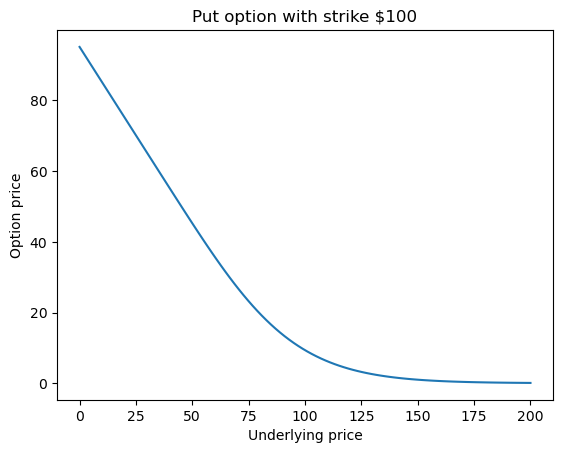

Black Scholes Put Option Price: 0.52


In [3]:
# Example of Black Scholes Model

black_scholes(S0=100, K=100, T=1, r=0.05, sigma=0.3, option_type="put", graph="yes")